<a href="https://colab.research.google.com/github/darshannayak21/bml/blob/main/kmeans8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering Accuracy: 17.82%


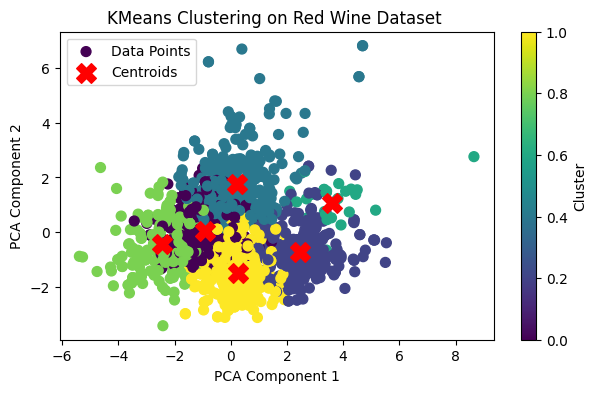

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

# Separate features and target (if you want to compare clusters to wine quality)
X = df.drop(columns=['quality'])
y = df['quality']  # Wine quality is used as a target (if desired for comparison purposes)

# Standardize the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Let's assume we use 6 clusters for the 6 wine qualities
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Map clusters to original wine qualities for comparison (you can adjust this mapping as needed)
# Here we do a simple manual mapping, which may vary
# (In practice, this mapping is adjusted after analyzing clusters visually or through additional methods)
cluster_mapping = {0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 8}  # Mapping clusters to wine quality levels
mapped_labels = [cluster_mapping[label] for label in labels]

# Calculate accuracy by comparing mapped cluster labels to actual wine quality
accuracy = accuracy_score(y, mapped_labels)

# Print the accuracy score
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")

# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(7, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, label='Data Points')

# Transform centroids to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title(f'KMeans Clustering on Red Wine Dataset ')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


Clustering Accuracy: 44.67%


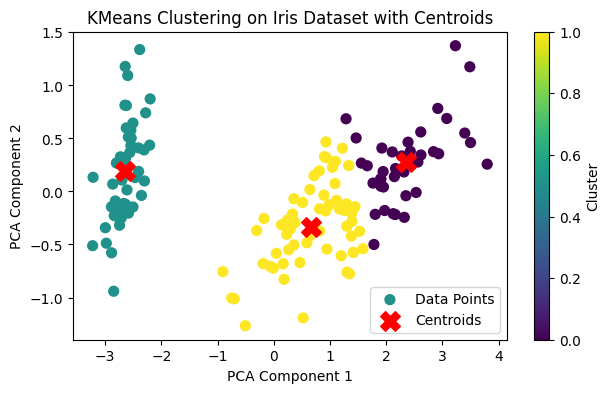

In [6]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Add cluster labels to a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['Cluster'] = labels

# Map clusters to original labels (for comparison)
# Because the KMeans cluster labels may not align with the actual labels, we map them.
# This is one simple way to adjust them:
cluster_mapping = {0: 1, 1: 0, 2: 2}
mapped_labels = [cluster_mapping[label] for label in labels]

# Calculate accuracy by comparing mapped cluster labels to actual labels
accuracy = accuracy_score(y, mapped_labels)

# Print the accuracy score
print(f"Clustering Accuracy: {accuracy * 100:.2f}%")

# Visualize the clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(7, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50, label='Data Points')

# Transform centroids to PCA space
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title(f'KMeans Clustering on Iris Dataset with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()
